In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np

In [3]:
df1 = pd.read_csv("fcc-forum-pageviews.csv").set_index('date')
df1.index = pd.to_datetime(df1.index)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [4]:
def parse_date(x):
    return datetime.strptime(x, "%Y-%m-%d")



In [5]:
df = pd.read_csv(
    "./fcc-forum-pageviews.csv",
    index_col=["date"],
    parse_dates=["date"],
    date_parser=parse_date,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


C:\Users\akash\AppData\Local\Temp\ipykernel_4360\3277206210.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


In [6]:
df1 = df1[(df1["value"] >= df1["value"].quantile(0.025)) & (df1["value"] <= df1["value"].quantile(0.975))]
df1

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [7]:
df = df.loc[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


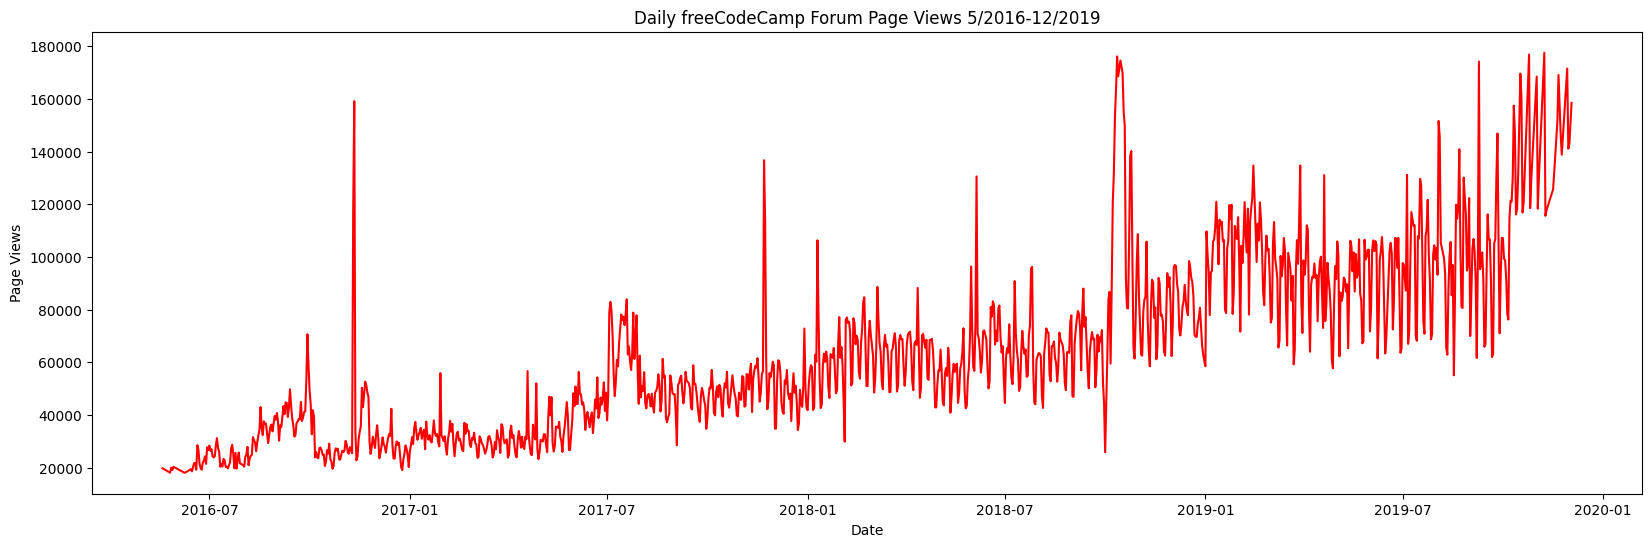

In [8]:
plt.figure(figsize= (20, 6))
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
x = df1.index  # X-axis points
y = df1.value
plt.plot(x, y, color='r')
plt.show()

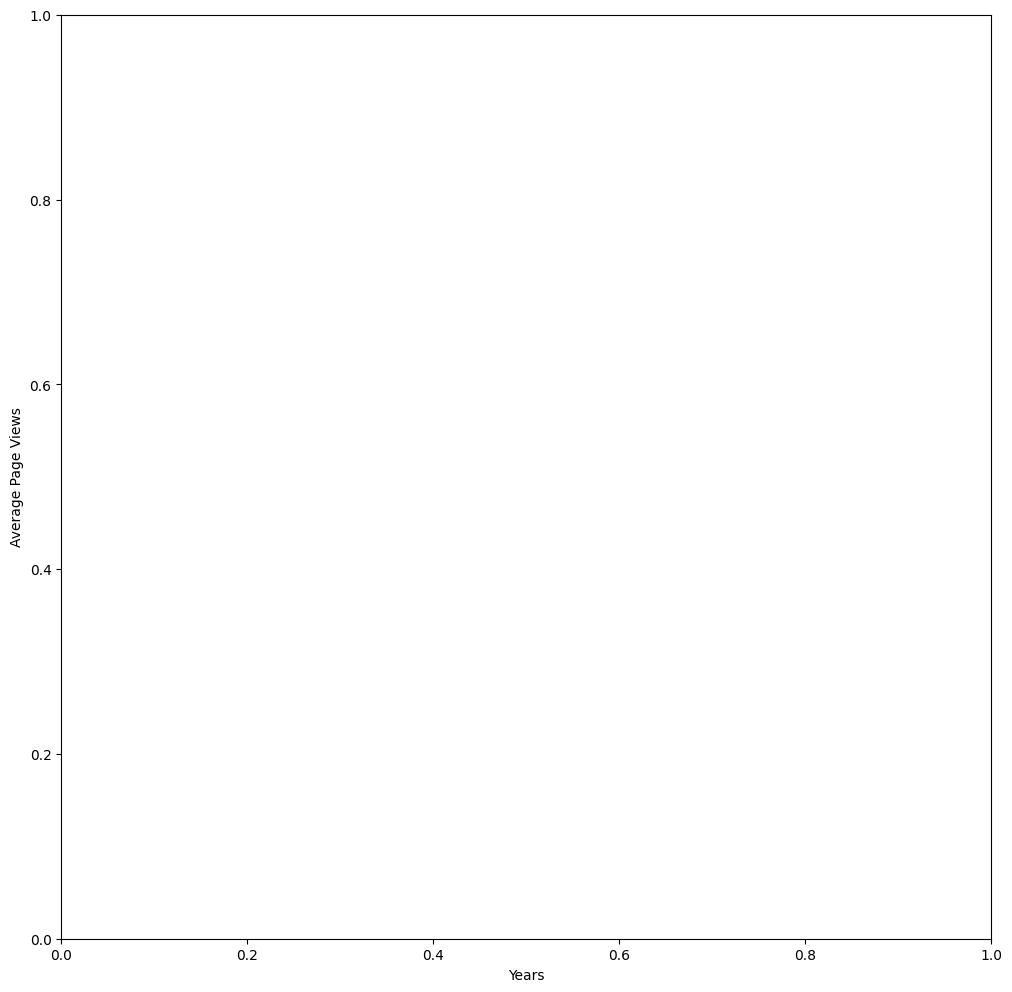

In [9]:
plt.figure(figsize=(12, 12))
plt.xlabel("Years")
plt.ylabel("Average Page Views")

jan = []

plt.show()

In [10]:
df_bar = (
        df1.copy()
        .groupby(pd.Grouper(freq="M"))
        .mean()
        .rename(columns={"value": "avg"})
    )
df_bar

C:\Users\akash\AppData\Local\Temp\ipykernel_4360\2620787714.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(freq="M"))


,avg
date,
2016-05-31,19432.400000
2016-06-30,21875.105263
2016-07-31,24109.678571
2016-08-31,31049.193548
2016-09-30,41476.866667
2016-10-31,27398.322581
2016-11-30,40448.633333
2016-12-31,27832.419355
2017-01-31,32785.161290


In [11]:
df_bar["year"] = pd.DatetimeIndex(df_bar.index).year
df_bar["month"] = pd.DatetimeIndex(df_bar.index).strftime("%B")

In [12]:
df_bar

,avg,year,month
date,,,
2016-05-31,19432.400000,2016,May
2016-06-30,21875.105263,2016,June
2016-07-31,24109.678571,2016,July
2016-08-31,31049.193548,2016,August
2016-09-30,41476.866667,2016,September
2016-10-31,27398.322581,2016,October
2016-11-30,40448.633333,2016,November
2016-12-31,27832.419355,2016,December
2017-01-31,32785.161290,2017,January


In [13]:
df_bar = pd.melt(df_bar, id_vars= ["year", "month"], value_vars= "avg")
df_bar

,year,month,variable,value
0,2016,May,avg,19432.400000
1,2016,June,avg,21875.105263
2,2016,July,avg,24109.678571
3,2016,August,avg,31049.193548
4,2016,September,avg,41476.866667
5,2016,October,avg,27398.322581
6,2016,November,avg,40448.633333
7,2016,December,avg,27832.419355
8,2017,January,avg,32785.161290
9,2017,February,avg,31113.071429


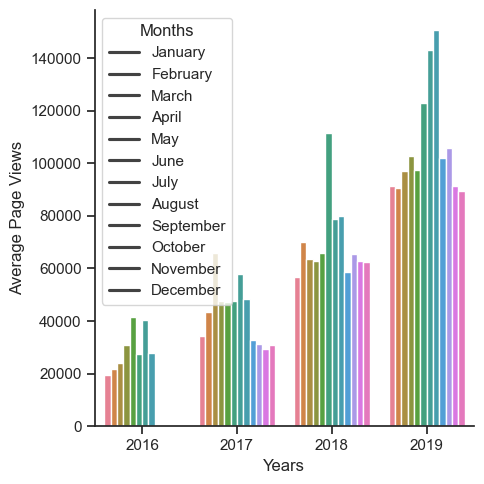

In [14]:
sns.set_theme(style="ticks")


fig = sns.catplot(
    data=df_bar,
    x="year",
    y="value",
    hue="month",
    kind="bar",
    legend=False,
)
sns.color_palette("Paired")

fig.set_xlabels("Years")
fig.set_ylabels("Average Page Views")
plt.legend(
    title="Months",
    loc="upper left",
    labels=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
       "October",
        "November",
        "December",
    ],
    
)

In [17]:
fig

In [ ]:
    df_box = df1.copy().rename(columns={"value": "views"})
    df_box

,views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [ ]:
df_box.reset_index(inplace=True)
df_box

,date,views
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [ ]:
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime("%b") for d in df_box.date]
df_box

,date,views,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


C:\Users\akash\AppData\Local\Temp\ipykernel_7952\689612858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["views"], palette="Set1")
C:\Users\akash\AppData\Local\Temp\ipykernel_7952\689612858.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax2, data=df_box, x=df_box["month"], y=df_box["views"],


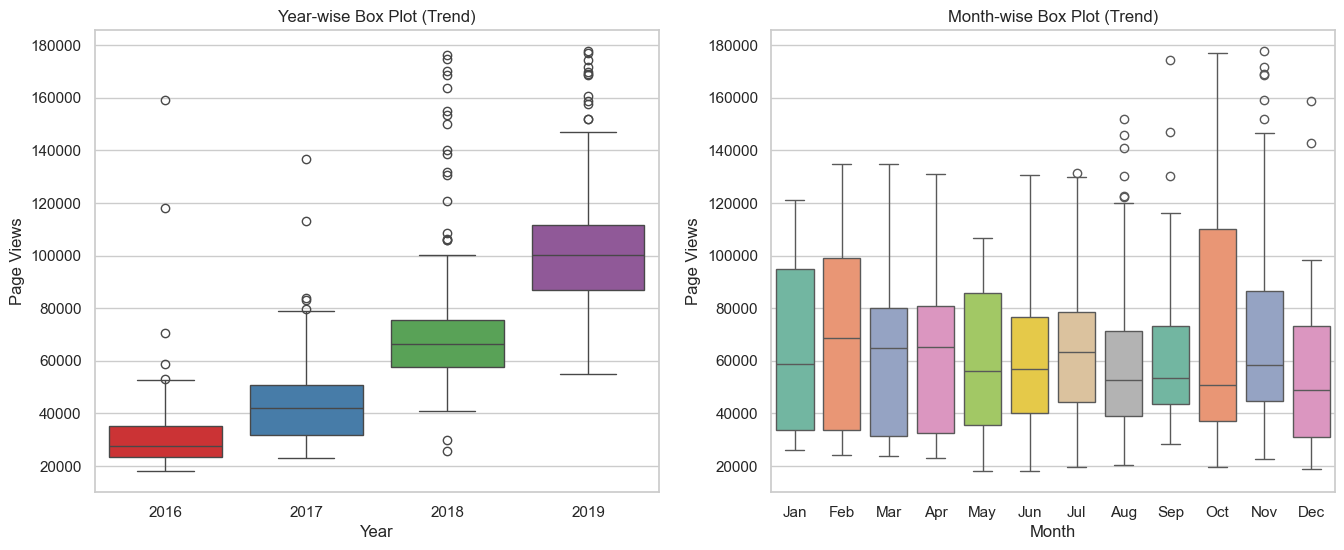

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["views"], palette="Set1")
ax1.set(
        xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)"
    )

sns.boxplot(ax=ax2, data=df_box, x=df_box["month"], y=df_box["views"], 
            order=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",]
            , palette="Set2")
ax2.set(
        xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Trend)"
    )

plt.show()